This IMU model simulates the IMU intrinsic noise. However, vibration induced by aerodynamics can cause a bigger fluctuation. Test data from Neural Fly shows 
- amplitude of 1N in z, 0.5N in x and y residual force fluctuation, 0.08s peak to peak time.
- 0.01(rad/s or deg/s ? unit not provided). 0.08s peak to peak time 

Considering Neural Fly drone weight is 2.5kg, the vibration amplitude is around 0.4~0.8 m/s2

These noise could dominate the IMU intrinsic noise and is not yet considered in this IMU noise model. 

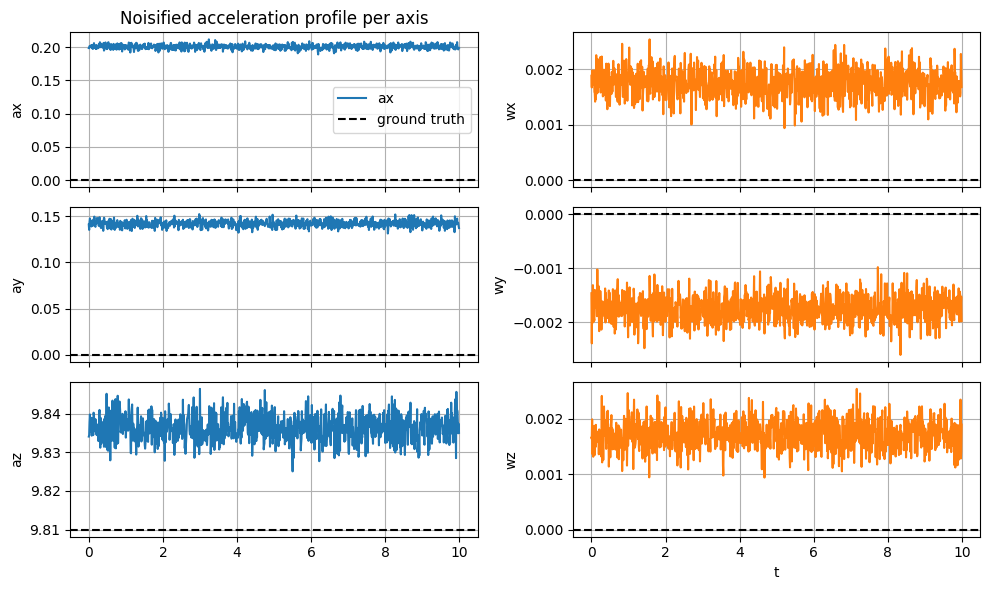

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import imu_model
import parameters as params

imu = imu_model.ImuModel()

t = np.arange(0, 10, 0.01)

ground_truth_accel = np.array([0.0, 0.0, params.Environment.g])
noisified_accel_profile = []
for _ in range(1000):
    noisified_accel = imu.create_noisified_accel(ground_truth_accel)
    noisified_accel_profile.append(noisified_accel)

noisified_accel_profile = np.vstack(noisified_accel_profile)

ground_truth_omega = np.array([0.0, 0.0, 0.0])
noisified_omega_profile = []
for _ in range(1000):
    noisified_omega = imu.create_noisified_omega(ground_truth_omega)
    noisified_omega_profile.append(noisified_omega)

noisified_omega_profile = np.vstack(noisified_omega_profile)

fig, axes = plt.subplots(3, 2, sharex=True, figsize=(10, 6))
axes = axes.ravel()
acc_labels = ['ax', 'ay', 'az']
omega_labels = ['wx', 'wy', 'wz']

for i in range(3):
    l_idx = 2 * i
    r_idx = l_idx + 1

    # Acceleration (left column)
    axes[l_idx].plot(t, noisified_accel_profile[:, i], label=acc_labels[i])
    axes[l_idx].axhline(ground_truth_accel[i], color='k', linestyle='--',
                        label='ground truth' if i == 0 else None)
    axes[l_idx].set_ylabel(acc_labels[i])
    axes[l_idx].grid(True)

    # Angular rate (right column)
    axes[r_idx].plot(t, noisified_omega_profile[:, i], label=omega_labels[i], color='C1')
    axes[r_idx].axhline(ground_truth_omega[i], color='k', linestyle='--',
                        label='ground truth' if i == 0 else None)
    axes[r_idx].set_ylabel(omega_labels[i])
    axes[r_idx].grid(True)

axes[-1].set_xlabel('t')
axes[0].set_title('Noisified acceleration profile per axis')
axes[0].legend()
plt.tight_layout()
plt.show()


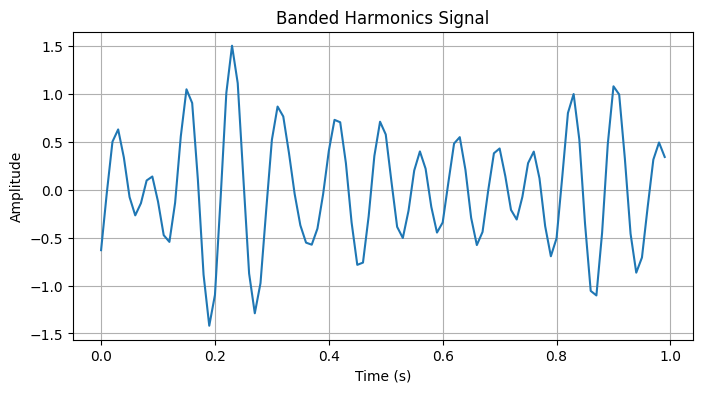

Mean: 0.0053353460092560945, RMS: 0.5934626908060291


In [ ]:
banded_harmonics = imu_model.BandedHarmonics(10.0, 15.0, 100, 0.5)
signal = []
t_span = np.arange(0, 1, 0.01)
for t in t_span:
    signal.append(banded_harmonics.get_signal(t))

plt.figure(figsize=(8, 4))
plt.plot(t_span, signal)
plt.title('Banded Harmonics Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

mean = np.mean(signal)
rms = np.sqrt(np.mean((signal - mean)**2))
print(f"Mean: {mean}, RMS: {rms}")